# Technical Analysis & Stock Prediction using Monte Carlo

### Introduction

This project Stock Market Analysis and Prediction uses data from Yahoo Finance for technical analysis, visualisation, and prediction. by examining stock market data, notably that of some enormous technological companies and others. Utilized pandas to obtain stock information, illustrate various elements of it, and, in the end, examine several approaches for measuring a stock's risk based on its prior performance. used the Monte Carlo approach to predict future stock values!
   
### Questions

I want to investigate the following issues in this analysis.

1. How much did the stock's price fluctuate over time?
2. What was the stock's average daily return?
3. What was the different stocks' moving average?
4. What was the relationship between the closing prices of various stocks?
4. What was the daily return correlation between the various stocks?
5. How much of our value is at danger when we buy a certain stock?
6. How can we try to forecast stock behaviour going forward?

In [85]:
# For division
from __future__ import division

# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


## Section 1 - Basic Analysis of Stock Information


In this section, I'll discuss using Pandas to handle stock information requests and how to analyse a stock's fundamental characteristics.


In [16]:
# List of Tech_stocks for analytics
tech_list = ['AAPL','GOOGL','MSFT','AMZN']

# set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

#For-loop for grabing yahoo finance data and setting as a dataframe
# Set DataFrame as the Stock Ticker

for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

Just a quick note: Setting the DataFrame names with globals() is dirty, but it's easy.

To acquire a sense for the data, let's start playing around with the AAPL (Apple) Stock DataFrame.

In [17]:
AAPL.head()

High         Low        Open       Close       Volume  \
Date                                                                      
2021-09-28  144.750000  141.690002  143.250000  141.910004  108972300.0   
2021-09-29  144.449997  142.029999  142.470001  142.830002   74602000.0   
2021-09-30  144.380005  141.279999  143.660004  141.500000   89056700.0   
2021-10-01  142.919998  139.110001  141.899994  142.649994   94639600.0   
2021-10-04  142.210007  138.270004  141.759995  139.139999   98322000.0   

             Adj Close  
Date                    
2021-09-28  141.119217  
2021-09-29  142.034119  
2021-09-30  140.711517  
2021-10-01  141.855103  
2021-10-04  138.364655

In [18]:
# Summery stats for Apple Stock
AAPL.describe()

High         Low        Open       Close        Volume  \
count  252.000000  252.000000  252.000000  252.000000  2.520000e+02   
mean   160.501468  156.564841  158.422500  158.612262  8.877043e+07   
std     12.412308   12.345863   12.471152   12.365545  2.619248e+07   
min    132.389999  129.039993  130.070007  130.059998  4.100000e+07   
25%    150.082504  147.584995  148.847500  148.932507  7.019855e+07   
50%    161.970001  156.625000  159.580002  159.260002  8.402815e+07   
75%    171.057503  167.220001  169.232502  168.970005  1.002058e+08   
max    182.940002  179.119995  182.630005  182.009995  1.954327e+08   

        Adj Close  
count  252.000000  
mean   158.183745  
std     12.304154  
min    129.879593  
25%    148.499779  
50%    158.877831  
75%    168.630119  
max    181.259933

In [19]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-09-28 to 2022-09-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


Let's plot the volume and closing price of the AAPL (Apple) stocks now that we've seen the DataFrame.

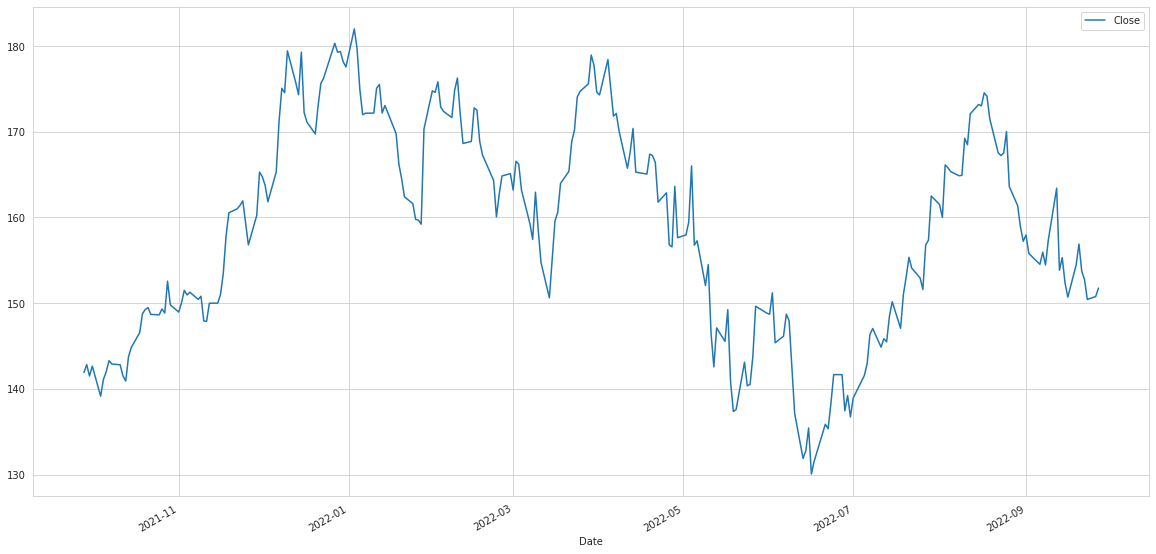

In [25]:
# Let's see a historical view of the closing price
AAPL['Close'].plot(legend=True, figsize=(20,10))

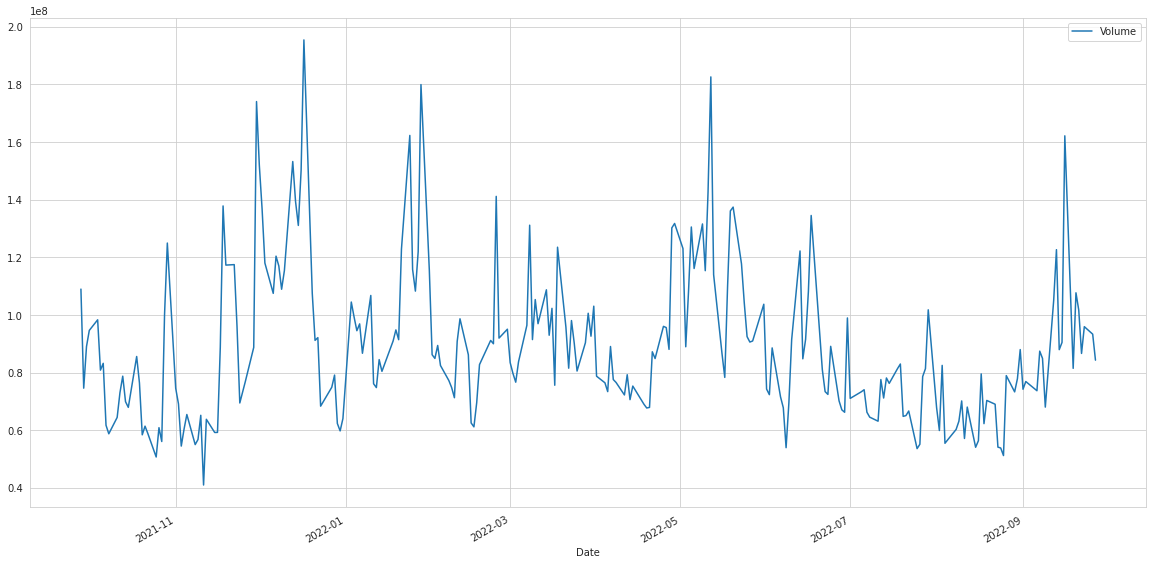

In [26]:
# Now let's plot the total volume of stock being traded each day over the past year

AAPL['Volume'].plot(legend=True, figsize=(20,10))

We can see that on Dec 2021 was the higher for AAPL stock being traded.

Now that we've seen the visualisations of the AAPL stock's closing price and daily trading volume.

Let's calculate the moving average for the AAPL stock right off the bat.

For more info on the Moving Average(SMA & EMA) check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp


In [149]:
# Pandas has a built-in rolling mean calculator
# Let's go ahead and plot out several moving averages
MA_day = [10, 20, 50, 100]
close_px1 = AAPL['Close']
for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name] = close_px1.rolling(window=ma).mean()

Let's now plot every other Moving Average for the AAPL stock.

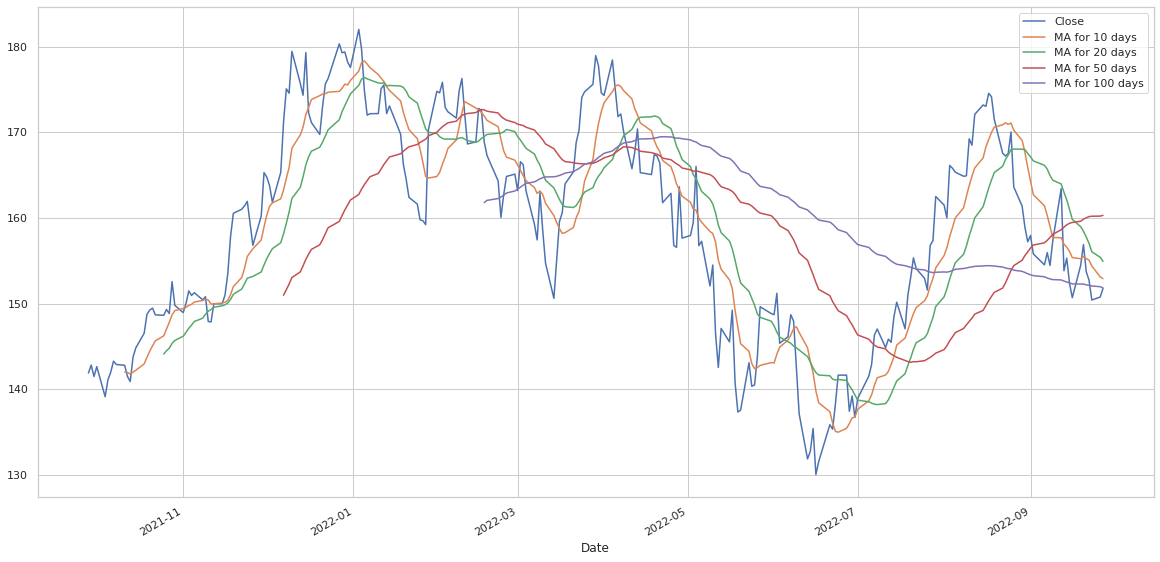

In [150]:
AAPL[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(20,10))

## Section 2 - Daily Return Analysis


After performing some baseline analysis, let's move on to further in-depth analysis. We're going to examine the stock's danger right now.

To achieve this, we must look more closely at the stock's daily fluctuations rather than just its absolute value. Let's retrieve the daily returns for the APPL stock using pandas.


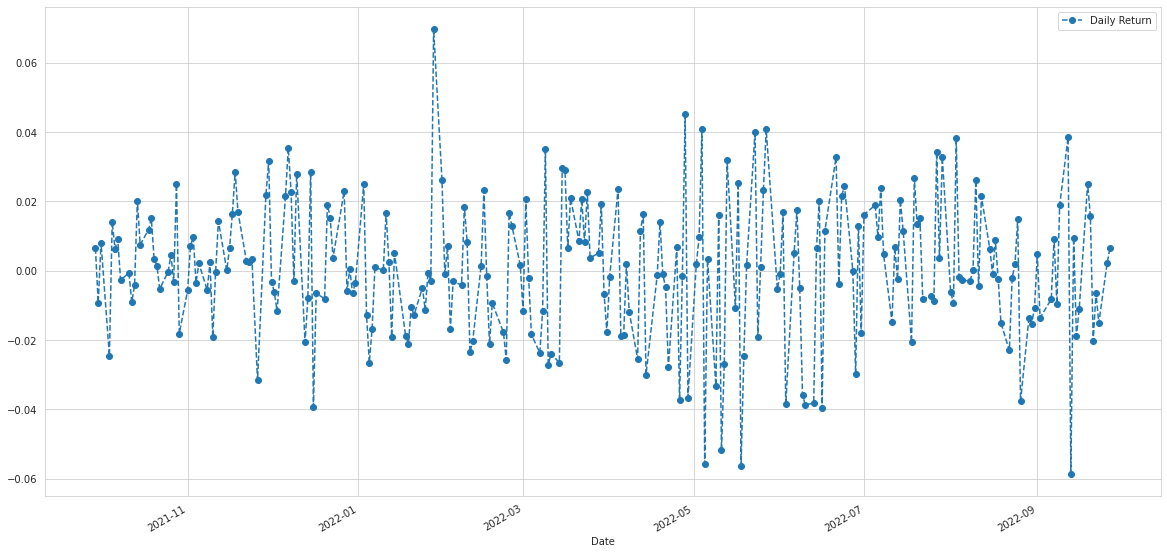

In [51]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Close'].pct_change()

# Lets plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(20,10), legend=True, linestyle='--', marker='o')

Excellent, let's use a histogram to obtain a general sense of the average daily return. On the same graphic, by using seaborn to generate both a histogram and a kde plot.

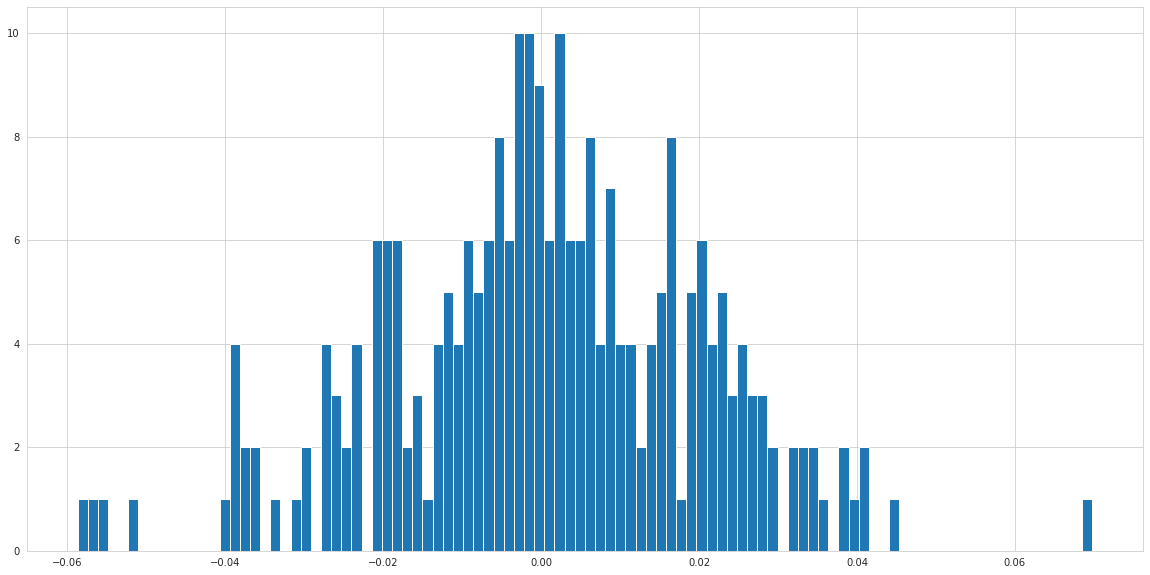

In [52]:
# only with histogram
AAPL['Daily Return'].hist(bins=100, figsize=(20,10))

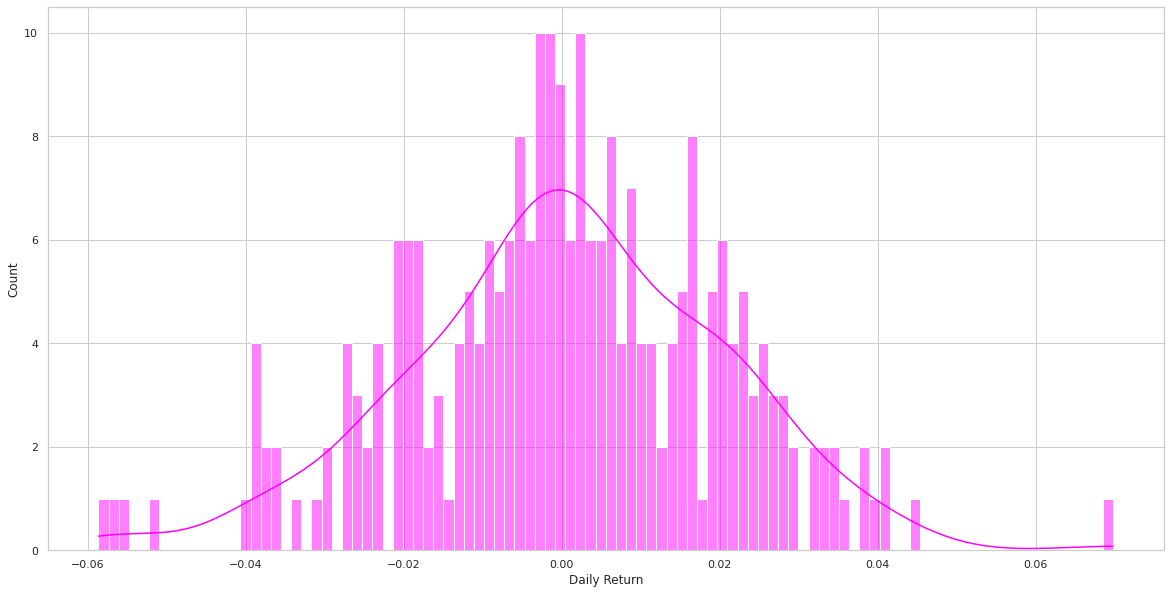

In [87]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(20,10))
ax = sns.histplot(AAPL['Daily Return'].dropna(), bins=100, color='magenta', kde = True)

What if we wanted to examine all of the stocks on our list's returns? To do that, we must create a DataFrame containing each stock dataframe's ['Close'] columns.

In [151]:
# Grab all the closing prices for the tech stock list into one DataFrame

closingprice_df = DataReader(tech_list, 'yahoo', start, end)['Close']

In [152]:
closingprice_df.head(10)

Symbols           AAPL       GOOGL        MSFT        AMZN
Date                                                      
2021-09-28  141.910004  135.830002  283.519989  165.798004
2021-09-29  142.830002  134.353500  284.000000  165.056000
2021-09-30  141.500000  133.675995  281.920013  164.251999
2021-10-01  142.649994  136.542999  289.100006  164.162994
2021-10-04  139.139999  133.659500  283.109985  159.488998
2021-10-05  141.110001  136.022995  288.760010  161.050003
2021-10-06  142.000000  137.565002  293.109985  163.100494
2021-10-07  143.289993  139.225006  294.850006  165.121506
2021-10-08  142.899994  139.785507  294.850006  164.431000
2021-10-11  142.809998  138.914001  294.230011  162.315002

Let's get the daily return for all the stocks now that we have all the closing prices, just like we did for the APPL stock.

In [153]:
# make a new tech returns DataFrame
tech_returns = closingprice_df.pct_change()

In [154]:
tech_returns.head()

Symbols         AAPL     GOOGL      MSFT      AMZN
Date                                              
2021-09-28       NaN       NaN       NaN       NaN
2021-09-29  0.006483 -0.010870  0.001693 -0.004475
2021-09-30 -0.009312 -0.005043 -0.007324 -0.004871
2021-10-01  0.008127  0.021447  0.025468 -0.000542
2021-10-04 -0.024606 -0.021118 -0.020720 -0.028472

Given that we can compare two equities' daily percentage returns, we can determine how connected they are. Let's first examine a stock in comparison to itself.

**GOOGL is a Alphabet Inc Class A Stock.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


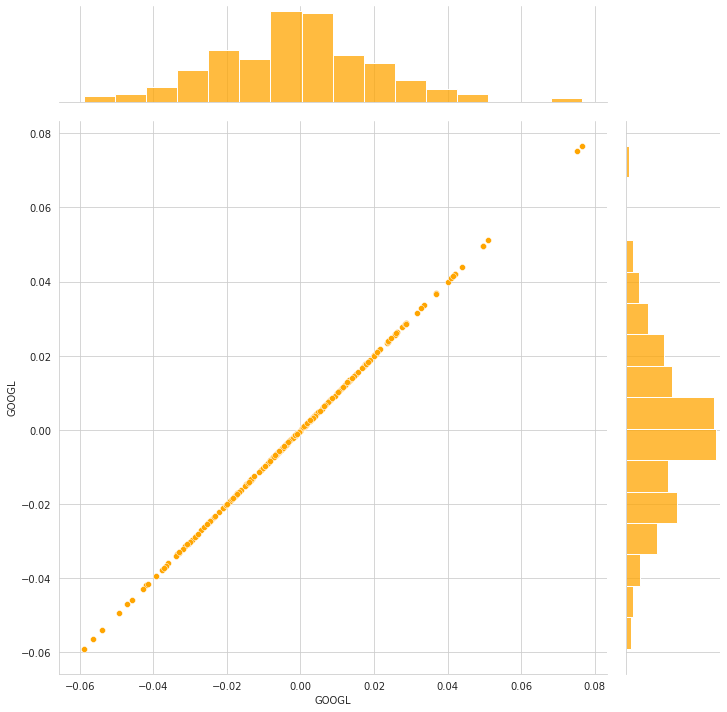

In [64]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOGL','GOOGL',tech_returns,kind='scatter', height = 10, color='orange')

So now we can see that a linear relationship between two stocks' daily return values should exist if they are perfectly (and positively) connected with one another.

So let's compare Google and Amazon using the same criteria.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


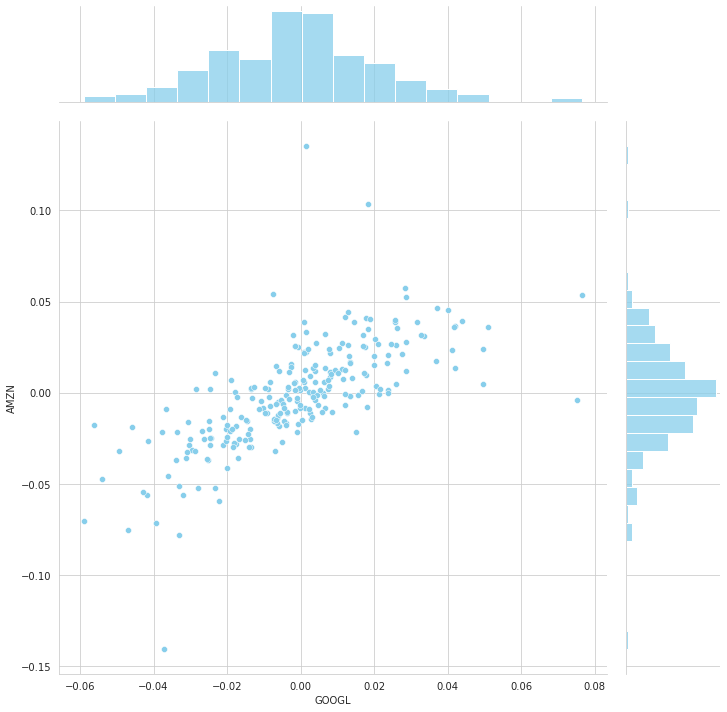

In [63]:
# We'll use joinplot to compare the daily returns of Google and Amazon.

sns.jointplot('GOOGL','AMZN',tech_returns, kind='scatter',height=10, color='skyblue')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


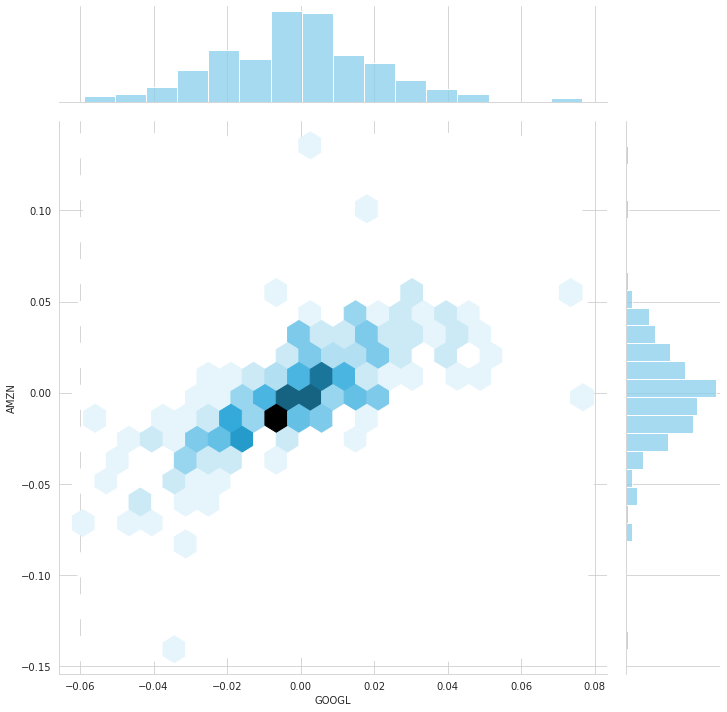

In [65]:
# with Hex plot
sns.jointplot('GOOGL','AMZN',tech_returns, kind='hex', height = 10 , color='skyblue')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


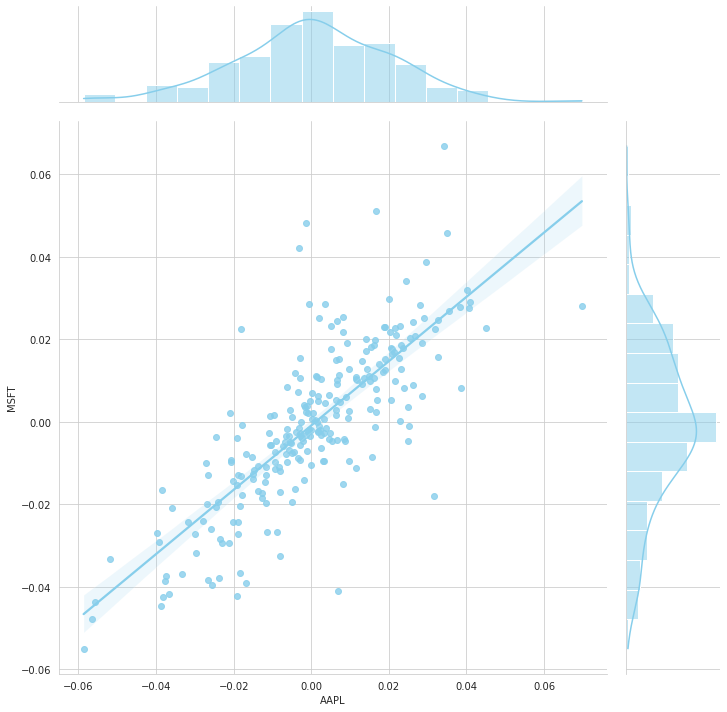

In [66]:
# Lets check out for Apple and Microsoft with reg jointplot
sns.jointplot('AAPL','MSFT',tech_returns, kind='reg', height = 10, color='skyblue')

You may get an idea of how connected the daily % returns are by looking at the pearsonr number, which is also known as the Pearson product-moment correlation coefficient in official terminology. Visit this link for additional information on it:

Url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

But for a quick intuitive sense, check out the picture below.

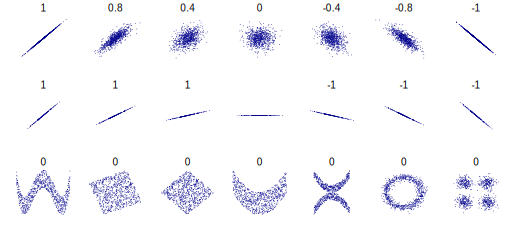

In [67]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

Repeating this comparison analysis for every possible combination of stocks in our technology stock ticker list is made incredibly simple by Seaborn and Pandas. To generate this plot automatically, use sns.pairplot().

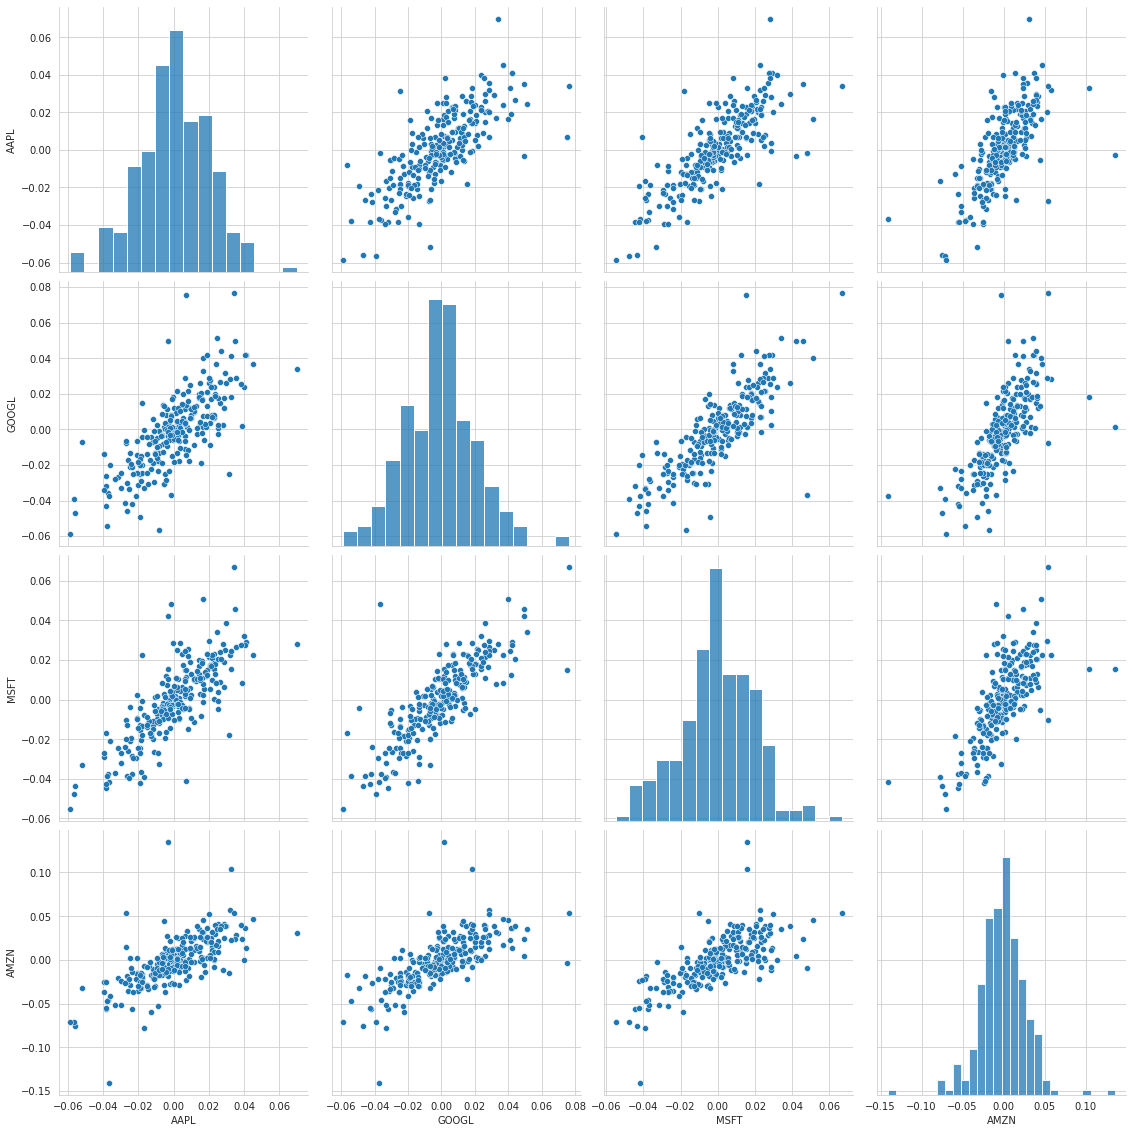

In [68]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_returns.dropna(), height = 4)

The correlations between all the stocks' daily results are shown above. A short examination reveals an intriguing similarity between the daily returns from Google and Microsoft. Investigating that particular comparison would be fascinating. We can use sns.PairGrid() to fully manage the figure, including what kinds of plots go in the diagonal, the upper triangle, and the bottom triangle, even if the simplicity of just calling sns.pairplot() is amazing.

Here's an illustration of how to use seaborn's full potential to this end.

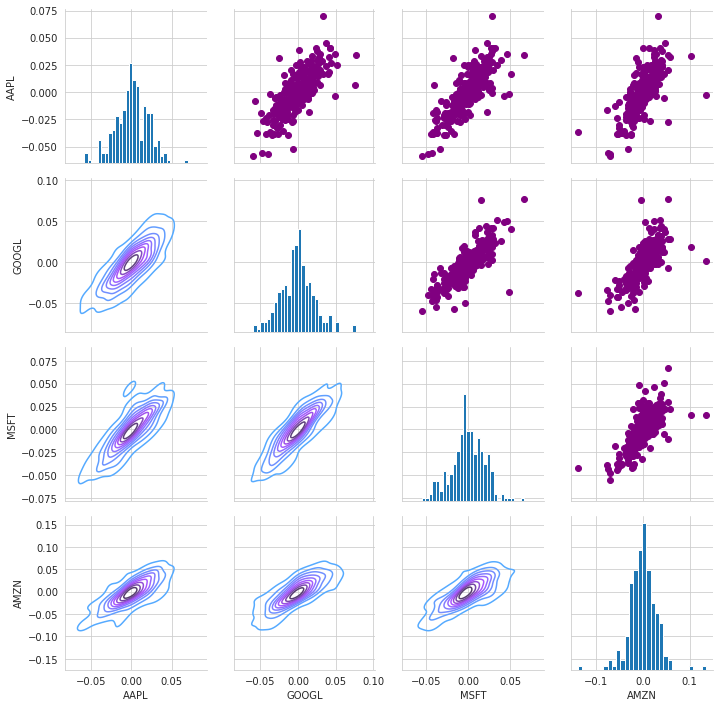

In [69]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Using the same method, we can examine the correlation between closing prices. The code from the previous section is replicated here, with the exception of the DataFrame call.

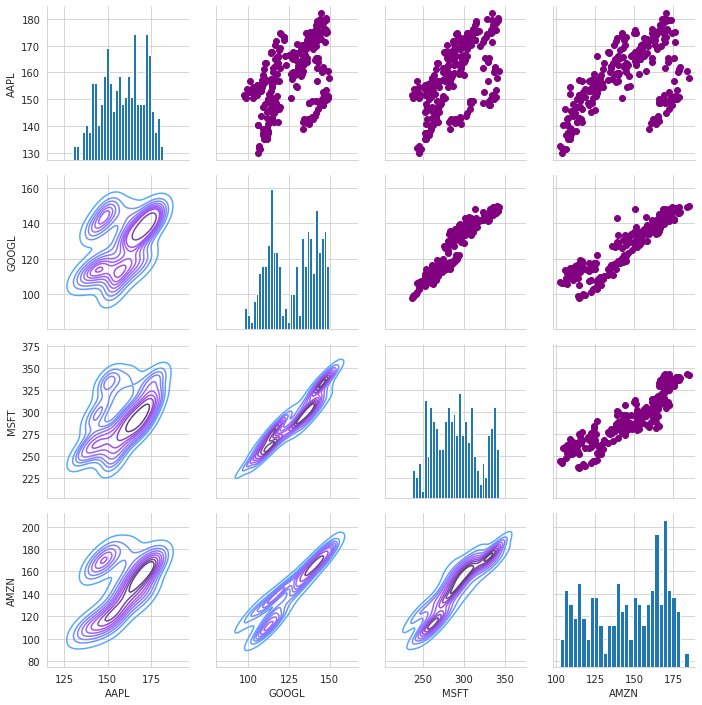

In [70]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(closingprice_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

To gain precise numerical figures for the correlation between the stocks' daily return values, we may also perform a correlation plot. We can observe an intriguing relationship between the stocks of Google and Microsoft by comparing their closing prices.

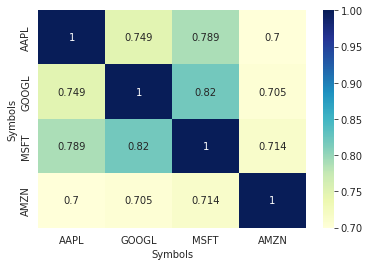

In [73]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
sns.heatmap(tech_returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

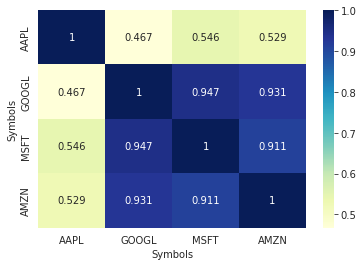

In [74]:
# Lets check out the correlation between closing prices of stocks
sns.heatmap(closingprice_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

Fantastic! We can see here, both quantitatively and visually, that Microsoft and Google had the strongest connection of daily stock return, as we had expected from our PairPlot. It's also intriguing to note the strong correlation between all of the technology companies.

Superb! After performing some daily return analysis, let's move on to more in-depth actual risk analysis.

## Risk Analysis

One of the simplest methods to evaluate risk using the data we've acquired on daily percentage returns is to compare the predicted return with the daily returns' standard deviation (Risk).

In [75]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_returns DataFrame
rets = tech_returns.dropna()

In [76]:
rets.head()

Symbols         AAPL     GOOGL      MSFT      AMZN
Date                                              
2021-09-29  0.006483 -0.010870  0.001693 -0.004475
2021-09-30 -0.009312 -0.005043 -0.007324 -0.004871
2021-10-01  0.008127  0.021447  0.025468 -0.000542
2021-10-04 -0.024606 -0.021118 -0.020720 -0.028472
2021-10-05  0.014158  0.017683  0.019957  0.009788

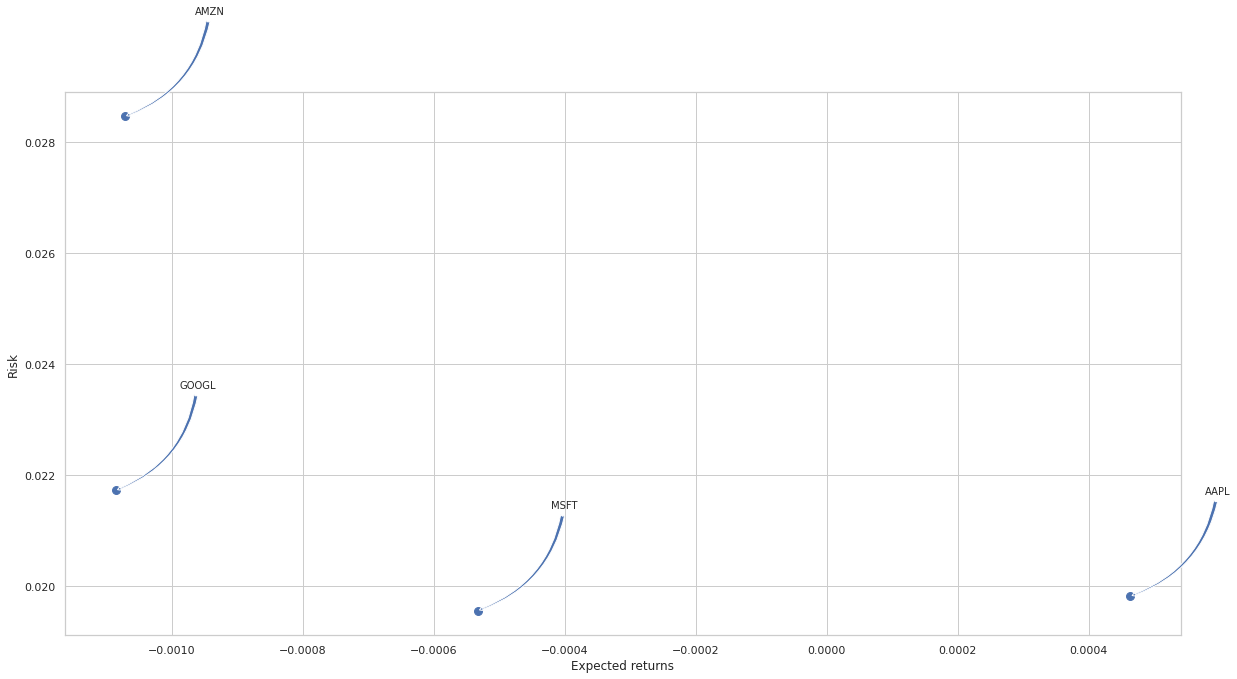

In [90]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi*20
plt.figure(figsize=(20,10))
plt.scatter(rets.mean(),rets.std(),s=area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
#plt.xlim([-0.0025,0.00025])
#lt.ylim([0.001,0.025])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, check out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (100, 100),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

Looking at the scatter plot, we can conclude that compared to Microsoft and Apple, Amazon and Google appear to have lower returns and somewhat larger risks.

## Value at Risk

Let's define a value at risk criterion for our stocks now. Value at risk can be thought of as the sum of money we could reasonably expect to lose (or put at risk) for a specific confidence interval. We can estimate a value at risk using a variety of techniques. Let's see some of them in action now.

**Value at risk using the "bootstrap" method**

A histogram of daily returns will be used to construct the empirical quantiles for this method. Visit this link for further details about quantiles: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

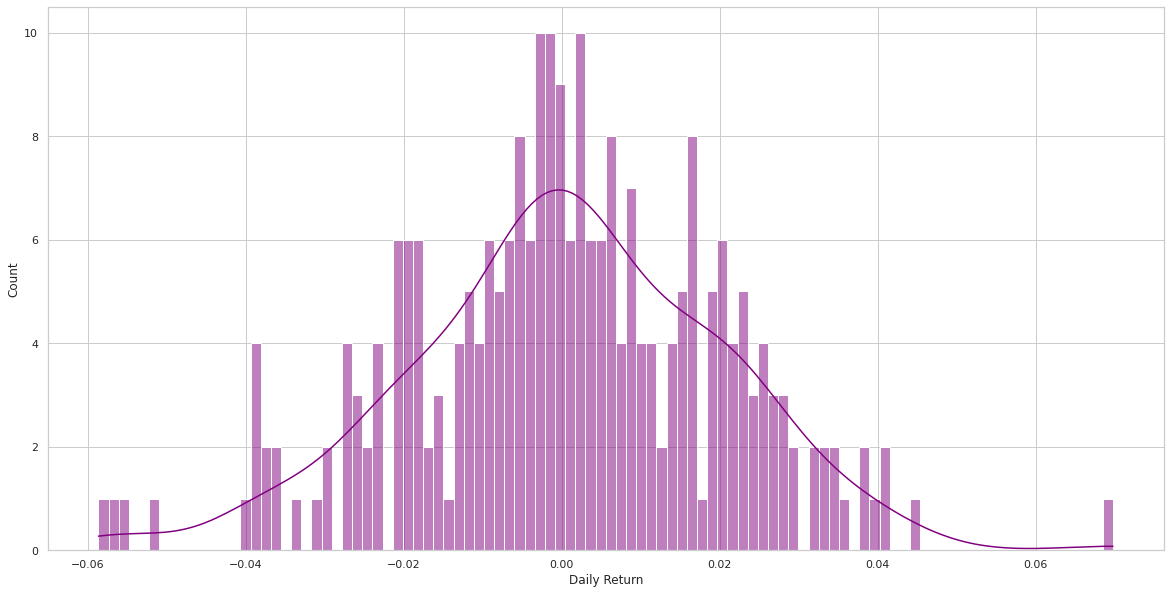

In [91]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(20,10))
ax = sns.histplot(AAPL['Daily Return'].dropna(),bins=100,color='purple', kde=True, )

Now we can use quantile to get the risk value for the stock.

In [92]:
# The 0.05 empirical quantile of daily returns

# For APPL stocks
rets["AAPL"].quantile(0.05)

-0.034572468132625045

The 0.05 empirical quantile of daily returns is at -0.034. That means that with 95% confidence, our worst daily loss will not exceed 3.4%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.034 * 1,000,000 = $34,000.

In [95]:
# For AMZN stocks
rets["AMZN"].quantile(0.05)

-0.046658890449502166

In [93]:
# For GOOGL stocks
rets["GOOGL"].quantile(0.05)

-0.03632731124287436

In [94]:
# For MSFT stocks
rets["MSFT"].quantile(0.05)

-0.037590307560667

## Value at Risk using the Monte Carlo method
We will quantify portfolio losses for each trial after running several Monte Carlo simulations under arbitrary market conditions. The sum of all these simulations will then be used to determine how hazardous the stock is.

Let's begin by giving a basic overview of what we're going to do:

We shall make use of the Markov process known as the geometric Brownian motion (GBM). This indicates that the stock price moves in a random manner and is in accordance with the efficient market hypothesis (EMH) in its weakest form, where past price information has already been taken into account and future price movements are "conditionally independent" of earlier ones.

In other words, you can't accurately anticipate the future based only on the past price of a stock. This means that historical information about a stock's price is independent of where the stock price will be in the future.


We can now see that the stock price change is simply the current stock price times two terms. The average daily return multiplied by the change in time results in the first term, which is referred to as "drift." The second term is "shock," and it describes how the stock will "float" for a period of time before experiencing a "shock" that will erratically move the stock price up or down. We can start to simulate where we would expect the stock price to be by simulating this series of drift and shock steps millions of times.

For additional information on the GBM model, or geometric Brownian motion, used to simulate stock prices, see the Monte Carlo approach for equities (GBM).

Check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

We will begin with a small number of simulations to illustrate a fundamental Monte Carlo technique. The variables we'll be using in the Google stock DataFrame GOOGL are first defined.

In [96]:
rets.head()

Symbols         AAPL     GOOGL      MSFT      AMZN
Date                                              
2021-09-29  0.006483 -0.010870  0.001693 -0.004475
2021-09-30 -0.009312 -0.005043 -0.007324 -0.004871
2021-10-01  0.008127  0.021447  0.025468 -0.000542
2021-10-04 -0.024606 -0.021118 -0.020720 -0.028472
2021-10-05  0.014158  0.017683  0.019957  0.009788

In [97]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for GOOGL
mu = rets.mean()['GOOGL']

# Now let's grab the volatility of the stock from the std() of the average return for GOOGL
sigma = rets.std()['GOOGL']

Next, we will create a function that takes in the starting price and number of days, and uses the sigma and mu we already calculated form our daily returns.

In [98]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Awesome! Now lets put above function to work.

In [99]:
# For Google Stock - GOOGL
GOOGL.head()

High         Low        Open       Close      Volume  \
Date                                                                     
2021-09-28  139.096497  135.360001  138.654999  135.830002  45772000.0   
2021-09-29  137.151001  133.865005  136.979996  134.353500  30848000.0   
2021-09-30  135.542496  133.556000  134.261505  133.675995  37996000.0   
2021-10-01  136.910507  134.072998  134.447495  136.542999  35360000.0   
2021-10-04  135.960495  131.050003  135.960495  133.659500  51202000.0   

             Adj Close  
Date                    
2021-09-28  135.830002  
2021-09-29  134.353500  
2021-09-30  133.675995  
2021-10-01  136.542999  
2021-10-04  133.659500

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

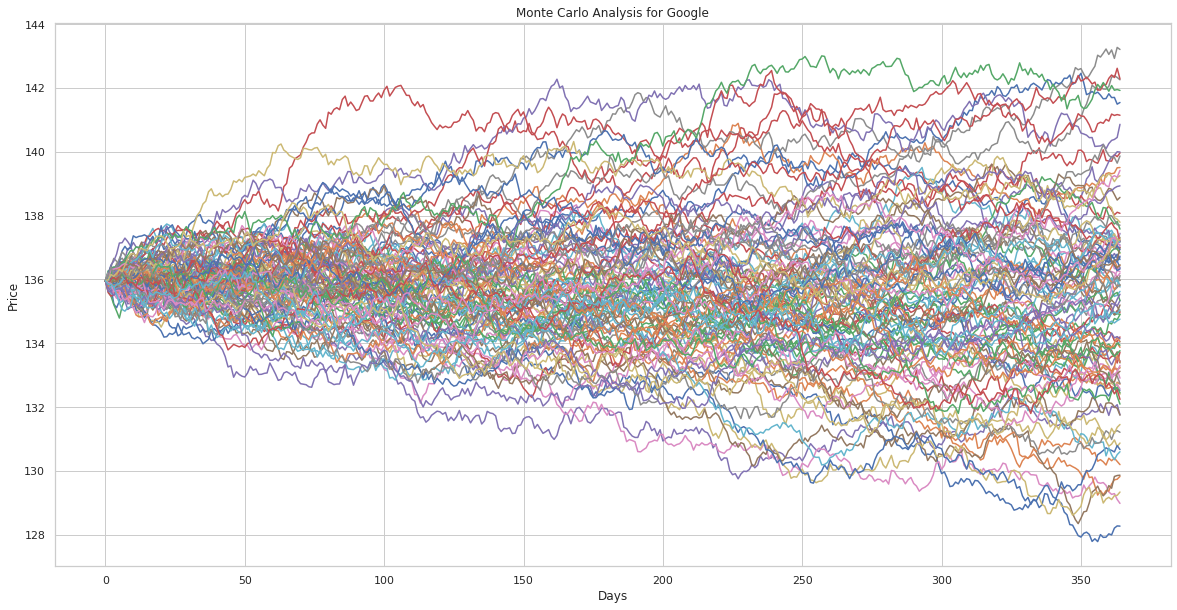

In [155]:
start_price = 135.96
plt.figure(figsize=(20,10)) 

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))  
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [103]:
# For Amazon Stock - AMZN
AMZN.head()

High         Low        Open       Close      Volume  \
Date                                                                     
2021-09-28  168.459503  164.505005  167.885498  165.798004  88616000.0   
2021-09-29  167.565002  164.893494  166.105499  165.056000  51246000.0   
2021-09-30  166.392502  163.699493  165.800003  164.251999  56848000.0   
2021-10-01  165.458496  162.796997  164.450500  164.162994  56712000.0   
2021-10-04  163.999496  158.812500  163.969498  159.488998  90462000.0   

             Adj Close  
Date                    
2021-09-28  165.798004  
2021-09-29  165.056000  
2021-09-30  164.251999  
2021-10-01  164.162994  
2021-10-04  159.488998

Text(0.5, 1.0, 'Monte Carlo Analysis for Amazon')

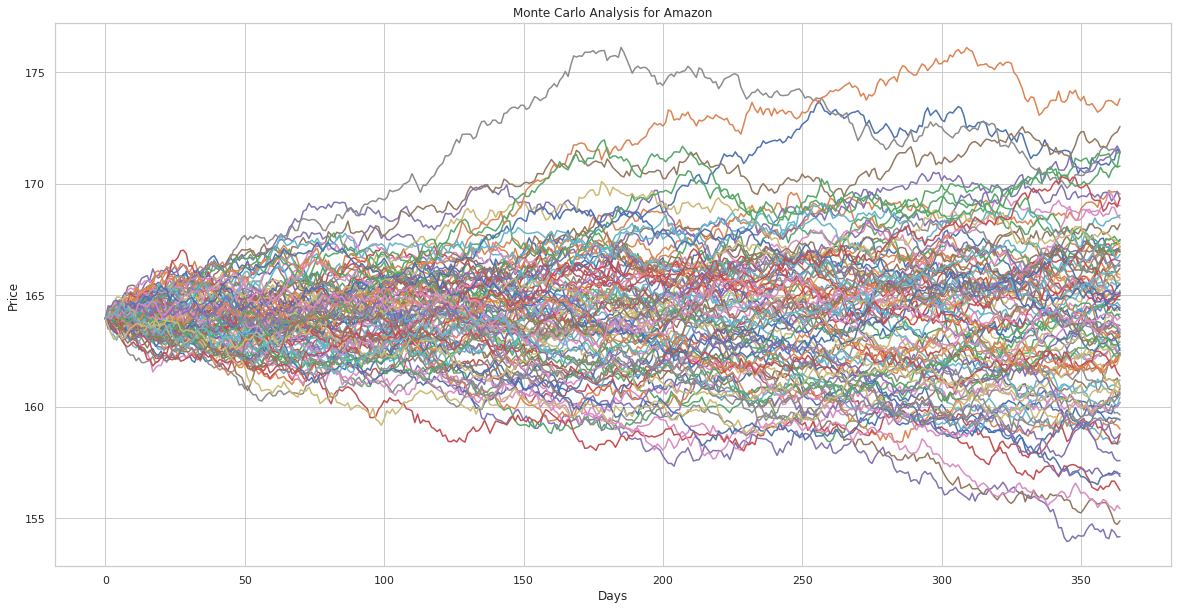

In [156]:
start_price = 163.96

plt.figure(figsize=(20,10))   
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Amazon')

In [105]:
# For Apple Stock - AAPL
AAPL.head()

High         Low        Open       Close       Volume  \
Date                                                                      
2021-09-28  144.750000  141.690002  143.250000  141.910004  108972300.0   
2021-09-29  144.449997  142.029999  142.470001  142.830002   74602000.0   
2021-09-30  144.380005  141.279999  143.660004  141.500000   89056700.0   
2021-10-01  142.919998  139.110001  141.899994  142.649994   94639600.0   
2021-10-04  142.210007  138.270004  141.759995  139.139999   98322000.0   

             Adj Close  MA for 10 days  MA for 20 days  MA for 50 days  \
Date                                                                     
2021-09-28  141.119217             NaN             NaN             NaN   
2021-09-29  142.034119             NaN             NaN             NaN   
2021-09-30  140.711517             NaN             NaN             NaN   
2021-10-01  141.855103             NaN             NaN             NaN   
2021-10-04  138.364655             NaN             NaN             NaN   

            MA for 100 days  Daily Return  
Date                                       
2021-09-28              NaN           NaN  
2021-09-29              NaN      0.006483  
2021-09-30              NaN     -0.009312  
2021-10-01              NaN      0.008127  
2021-10-04              NaN     -0.024606

Text(0.5, 1.0, 'Monte Carlo Analysis for Apple')

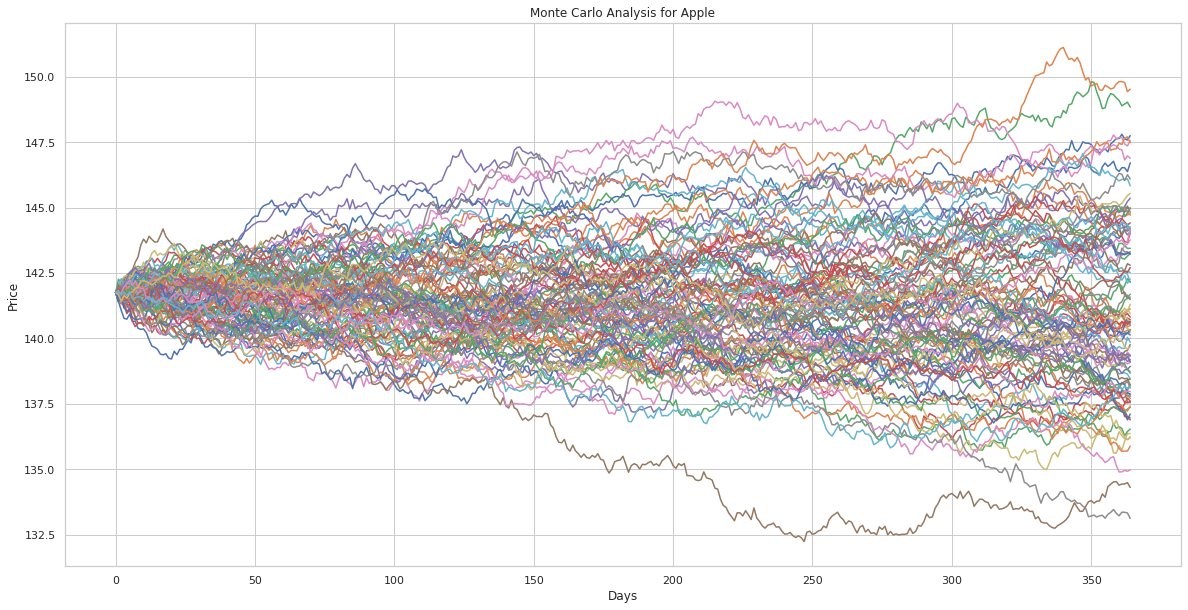

In [157]:
start_price = 141.75
plt.figure(figsize=(20,10))   

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Apple')

In [107]:
# For Microsoft Stock - MSFT
MSFT.head()

High         Low        Open       Close      Volume  \
Date                                                                     
2021-09-28  290.779999  282.750000  289.799988  283.519989  43186200.0   
2021-09-29  286.769989  283.010010  285.100006  284.000000  26353700.0   
2021-09-30  287.829987  281.619995  285.709991  281.920013  32343600.0   
2021-10-01  289.980011  281.290009  282.119995  289.100006  30086300.0   
2021-10-04  287.750000  280.250000  287.399994  283.109985  31350700.0   

             Adj Close  
Date                    
2021-09-28  281.165222  
2021-09-29  281.641235  
2021-09-30  279.578522  
2021-10-01  286.698883  
2021-10-04  280.758606

Text(0.5, 1.0, 'Monte Carlo Analysis for Microsoft')

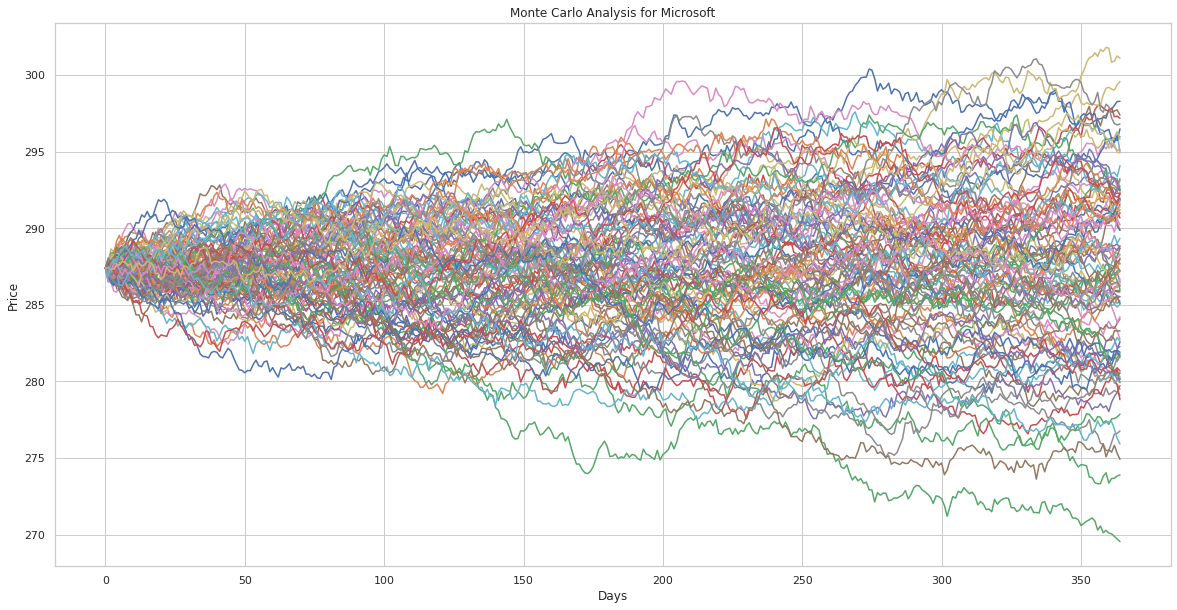

In [158]:
start_price = 287.39
plt.figure(figsize=(20,10))   

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Microsoft')

Let's go ahead and get a histogram of the end results for a much larger run. (note: This could take a little while to run , depending on the number of runs chosen)

Text(0.5, 1.0, '10,000 run Monte Carlo Analysis for Google')

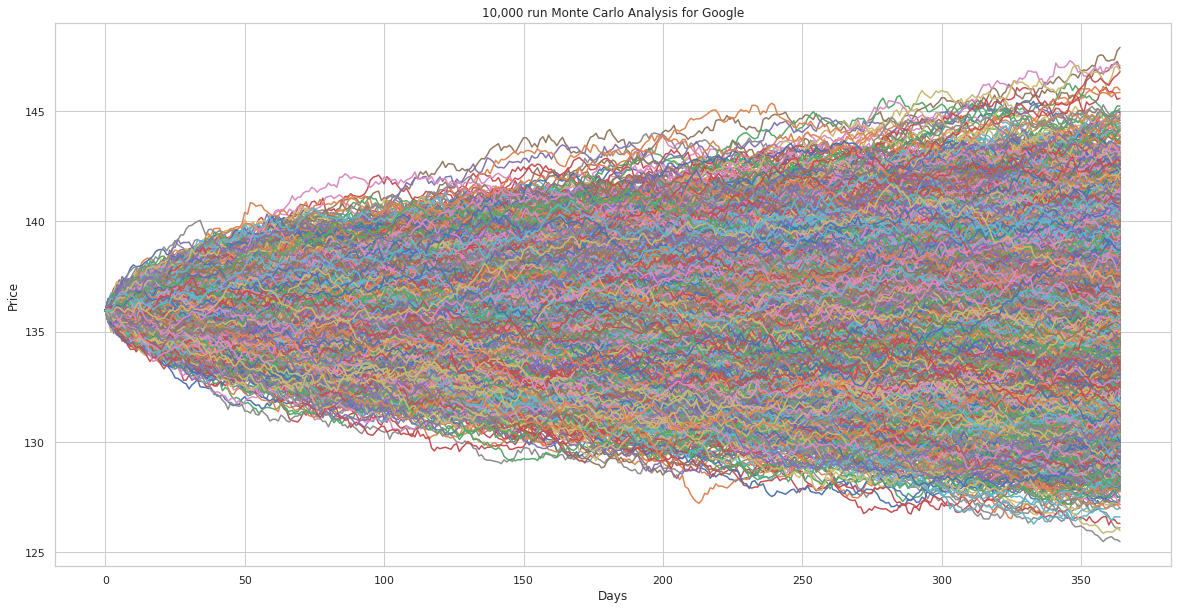

In [162]:
# Lets start with Google stock price
start_price = 135.96
plt.figure(figsize=(20,10))   
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('10,000 run Monte Carlo Analysis for Google')

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

For more info on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Text(0.5, 1.0, 'Final price distribution for Google Stock(GOOGL) after 365 days')

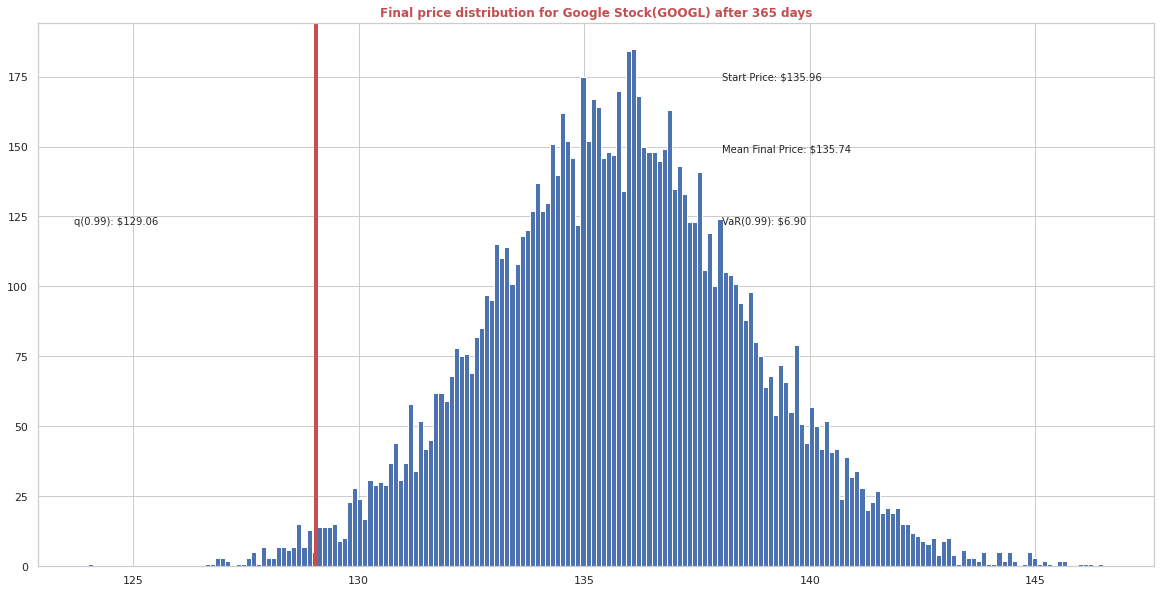

In [163]:

# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.figure(figsize=(20,10))   
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot 
# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(label="Final price distribution for Google Stock(GOOGL) after %s days" % days, weight='bold', color='R')


Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google Stock(GOOGL), which looks to be $6.90 for every investment of 
135.96 (The price of one initial Google Stock).

This basically means for every initial GOOGL stock you purchase you're putting about $6.90 at risk 99% of the time from our Monte Carlo Simulation.


##### Now lets plot remaining Stocks to estimate the VaR with our Monte Carlo Simulation.

In [164]:
# For Amazon Stock Price
start_price = 163.96

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Amazon Stock(AMZN) after 365 days')

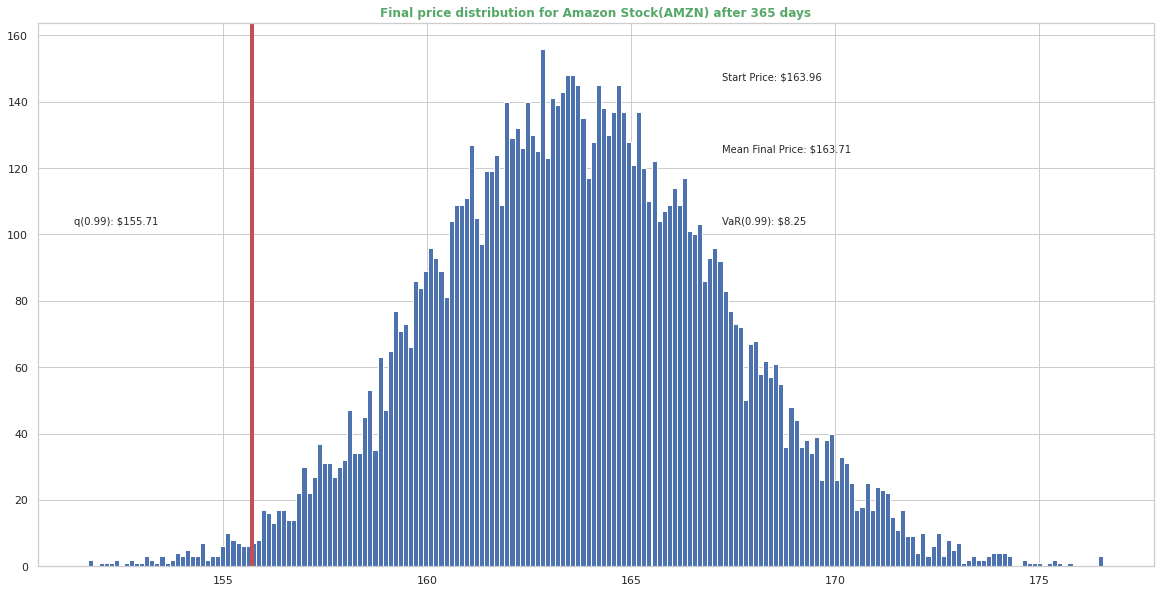

In [165]:

# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.figure(figsize=(20,10)) 
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(label="Final price distribution for Amazon Stock(AMZN) after %s days" % days, weight='bold', color='G')

This basically means for every initial AMZN stock you purchase you're putting about $8.25 at risk 99% of the time from our Monte Carlo Simulation.

In [166]:
# For Apple Stock Price
start_price = 141.75

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Apple Stock(AAPL) after 365 days')

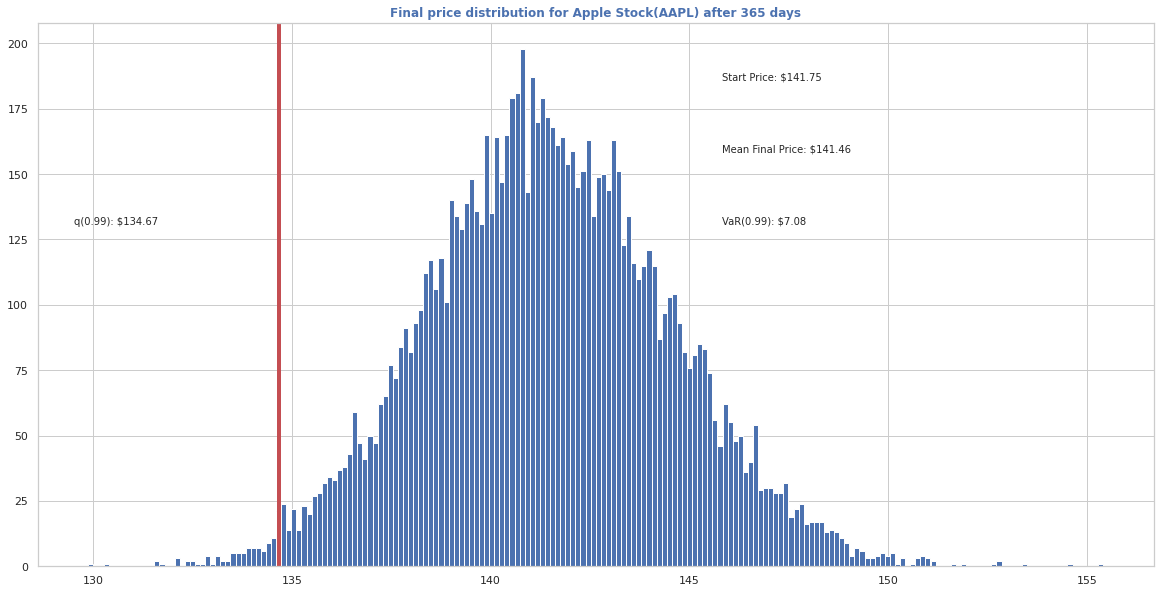

In [167]:

# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.figure(figsize=(20,10)) 
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(label="Final price distribution for Apple Stock(AAPL) after %s days" % days, weight='bold', color='B')

Great! This basically means for every initial AAPL stock you purchase you're putting about $7.08 at risk 99% of the time from our Monte Carlo Simulation.

In [168]:
# For Microsoft Stock Price
start_price = 287.39

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Microsoft Stock(MSFT) after 365 days')

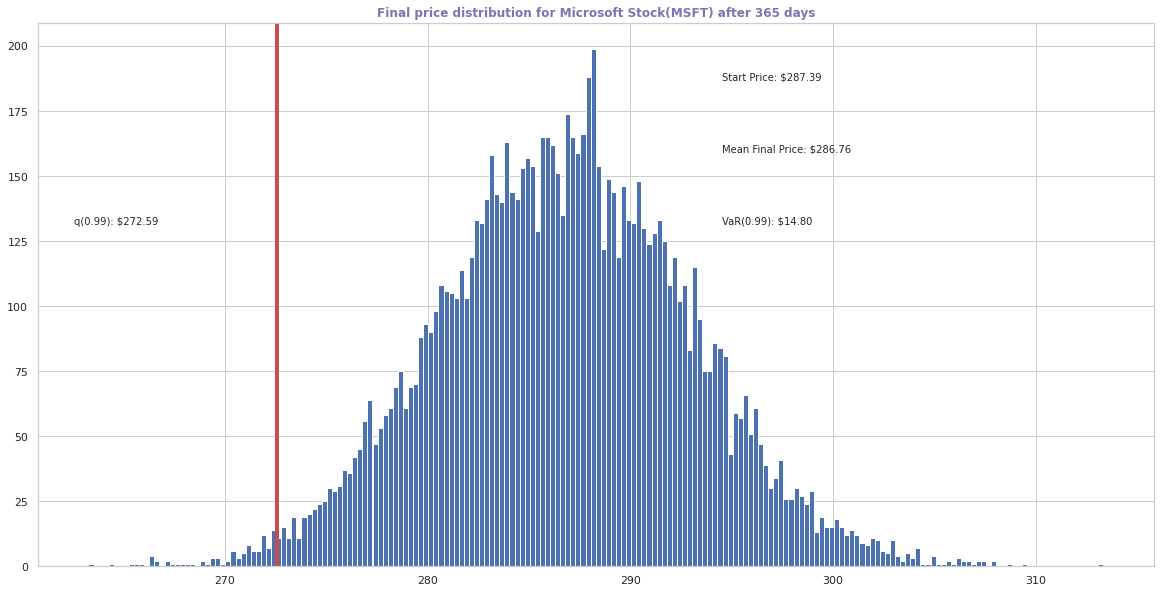

In [169]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.figure(figsize=(20,10)) 
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(label="Final price distribution for Microsoft Stock(MSFT) after %s days" % days, weight='bold', color='M')

Nice, This basically means for every initial MSFT stock you purchase you're putting $14.80 at risk 99% of the time from our Monte Carlo Simulation.

## Value at Risk for other Domains

Now lets estiamte the Value at Risk(VaR) for a stock related to other domains.


We'll estimate the VaR for:
 - Pfizer > PFE (U.S.: NYSE) [PFE](http://quotes.wsj.com/PFE)
 - Wal-Mart Stores Inc. > WMT (U.S.: NYSE) [WMT](http://quotes.wsj.com/WMT)
 - Nike Inc. > NKE (U.S.: NYSE) [NKE](http://quotes.wsj.com/NKE)
 

By using the above methods to get Value at Risk.

In [132]:
# List of NYSE_stocks for analytics
NYSE_list = ['PFE','NKE','WMT']

# set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

#For-loop for grabing google finance data and setting as a dataframe
# Set DataFrame as the Stock Ticker

for stock in NYSE_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

Let's take a look at the PFE DataFrame and get a feel for the stock

In [133]:
PFE.head()

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2021-09-28  43.279999  42.430000  43.070000  43.040001  28512200.0  41.677631
2021-09-29  43.689999  43.080002  43.220001  43.529999  18037200.0  42.152119
2021-09-30  44.049999  42.970001  43.790001  43.009998  21103300.0  41.648579
2021-10-01  43.099998  41.700001  42.520000  42.930000  38483000.0  41.571117
2021-10-04  43.349998  42.209999  42.930000  42.419998  28906500.0  41.077255

In [134]:
PFE.describe()

High         Low        Open       Close        Volume  \
count  252.000000  252.000000  252.000000  252.000000  2.520000e+02   
mean    50.844365   49.513492   50.167064   50.216230  2.910966e+07   
std      4.209661    3.962126    4.079646    4.108690  1.683734e+07   
min     41.700001   40.939999   41.450001   41.320000  1.093210e+07   
25%     48.434999   47.210001   47.680000   47.885001  1.810305e+07   
50%     51.270000   49.689999   50.565001   50.605000  2.577050e+07   
75%     53.612500   52.389999   52.860000   52.897499  3.370565e+07   
max     61.709999   59.830002   60.599998   61.250000  1.739591e+08   

        Adj Close  
count  252.000000  
mean    49.475579  
std      4.060410  
min     40.012077  
25%     47.415771  
50%     49.965706  
75%     52.176340  
max     59.831844

In [135]:
PFE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-09-28 to 2022-09-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


Now that we've seen the DataFrame, let's  plot out the closing prices of NYSE stocks.

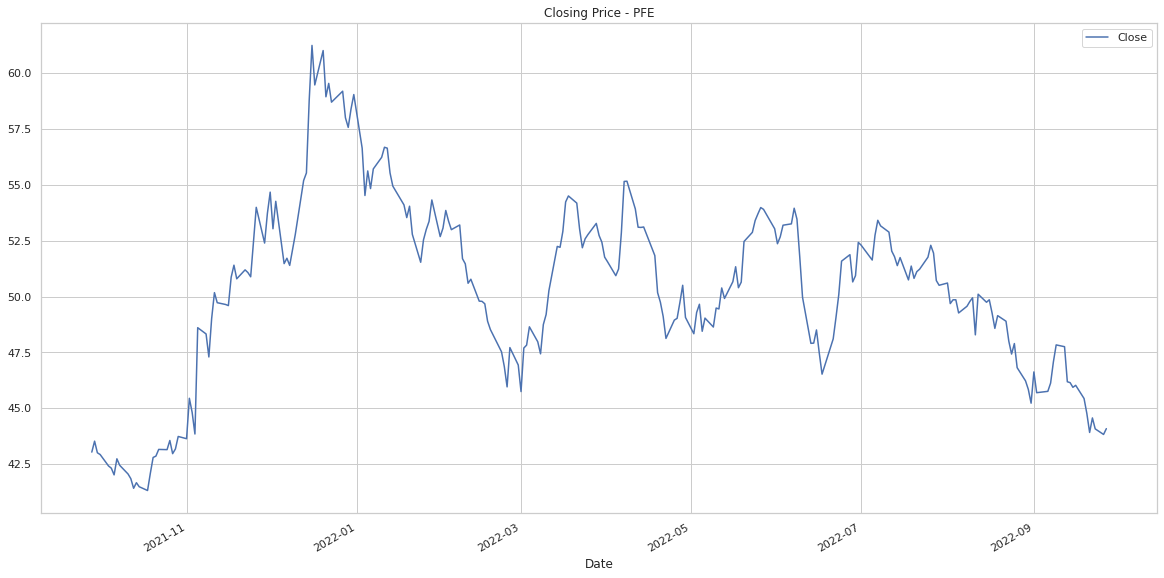

In [136]:
# Let's see a historical view of the closing price for PFE - Pfizer
PFE['Close'].plot(title='Closing Price - PFE',legend=True, figsize=(20,10))

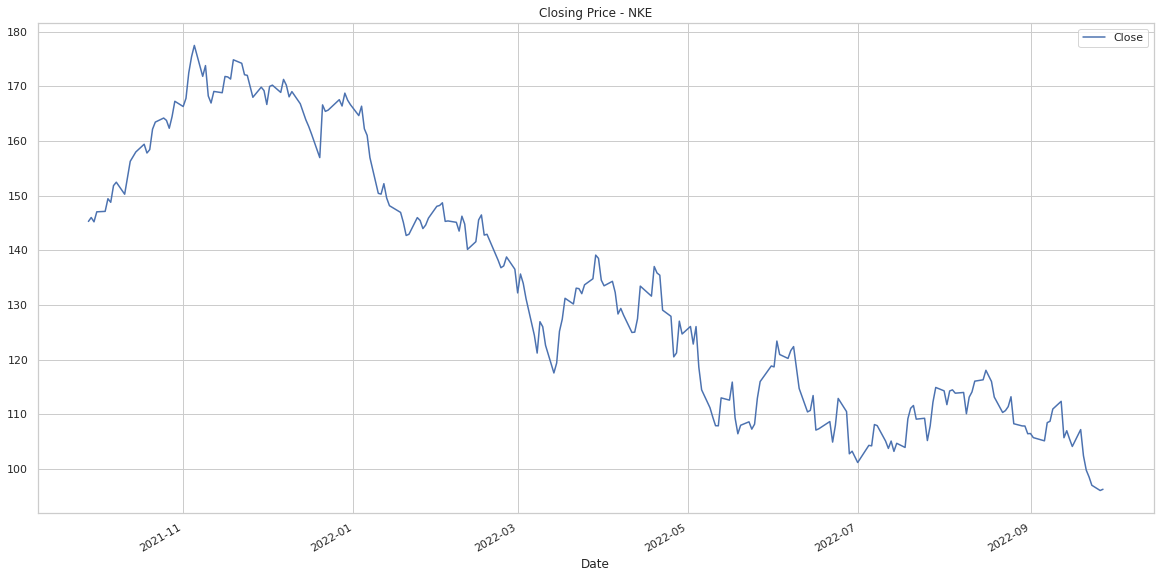

In [137]:
# Let's see a historical view of the closing price for NKE(Nike Inc.)
NKE['Close'].plot(title='Closing Price - NKE',legend=True, figsize=(20,10))

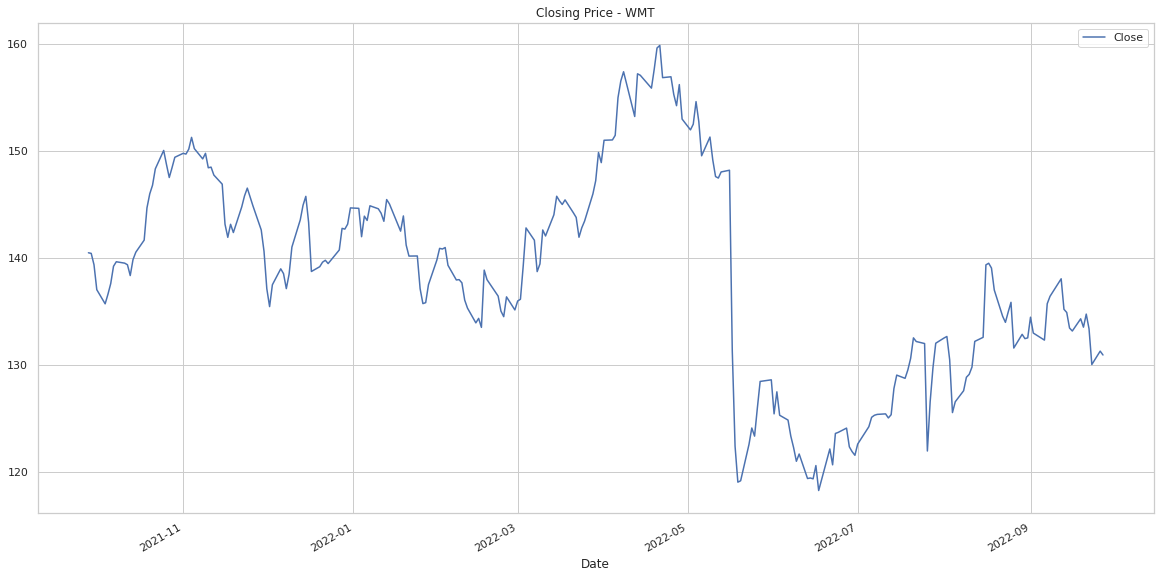

In [139]:
# Let's see a historical view of the closing price for WMT(Wal-Mart Stores Inc.)
WMT['Close'].plot(title='Closing Price - WMT',legend=True, figsize=(20,10))

## Value at risk using the "Bootstrap" method

We will calculate the empirical quantiles from a histogram of daily returns. Let's retrieve the daily returns for the JNJ, WMT & NKE stock.

In [140]:
# We'll use pct_change to find the percent change for each day

#For PFE stocks
PFE['Daily Return'] = PFE['Close'].pct_change()

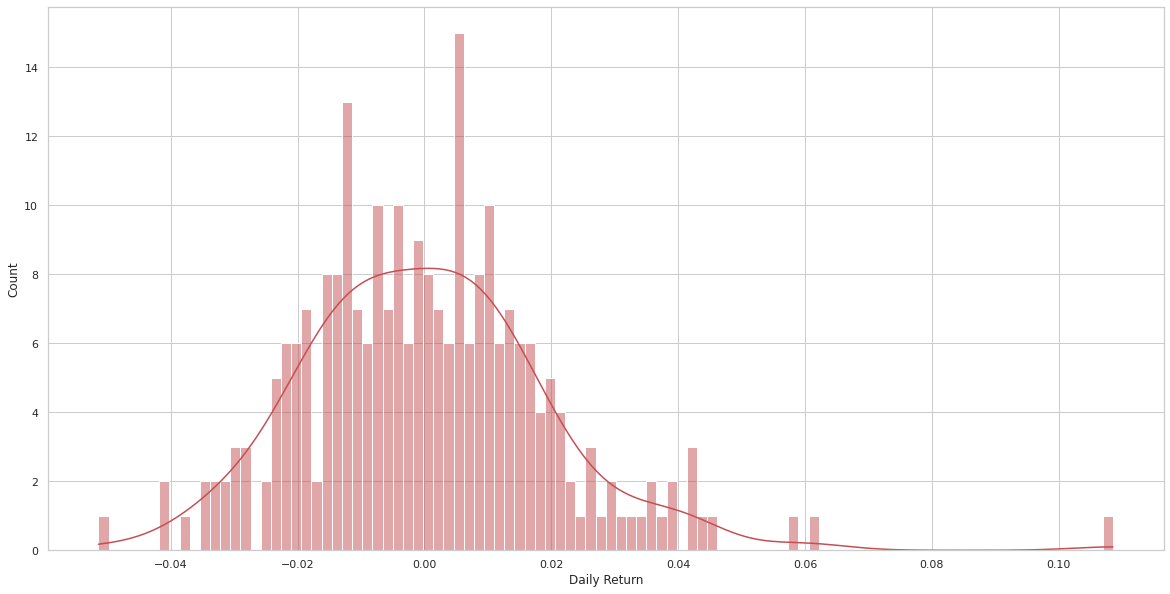

In [141]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(20,10)) 
sns.histplot(PFE['Daily Return'].dropna(),bins=100,color='R', kde = True)

In [142]:
(PFE['Daily Return'].dropna()).quantile(0.05)

-0.02926378401498947

The 0.05 empirical quantile of PFE stock daily returns is at -0.029. That means that with 95% confidence, our worst daily loss will not exceed 2.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.029 * 1,000,000 = $29,000.

In [143]:
# For WMT stocks
WMT['Daily Return'] = WMT['Close'].pct_change()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:177: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  kws["color"] = to_rgba(color, alpha)


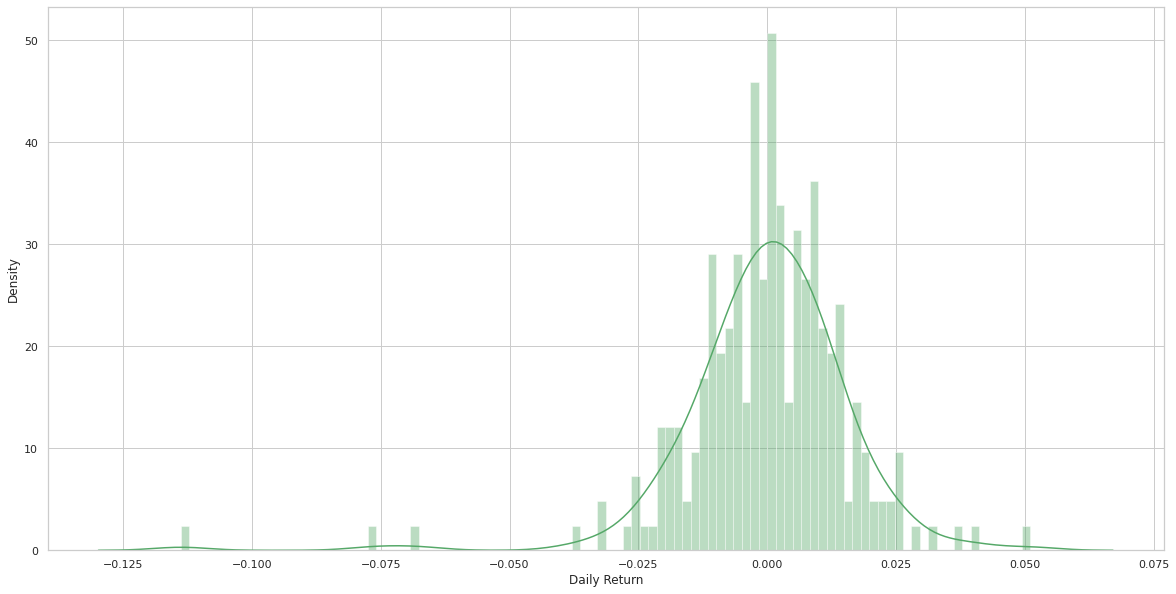

In [144]:
plt.figure(figsize=(20,10)) 
sns.distplot(WMT['Daily Return'].dropna(),bins=100,color='G')

In [145]:
(WMT['Daily Return'].dropna()).quantile(0.05)

-0.020750779836798683

The 0.05 empirical quantile of WMT stock daily returns is at -0.020. That means that with 95% confidence, our worst daily loss will not exceed 2%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.020 * 1,000,000 = $20,000.

In [146]:
# For NKE stocks
NKE['Daily Return'] = NKE['Close'].pct_change()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:177: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  kws["color"] = to_rgba(color, alpha)


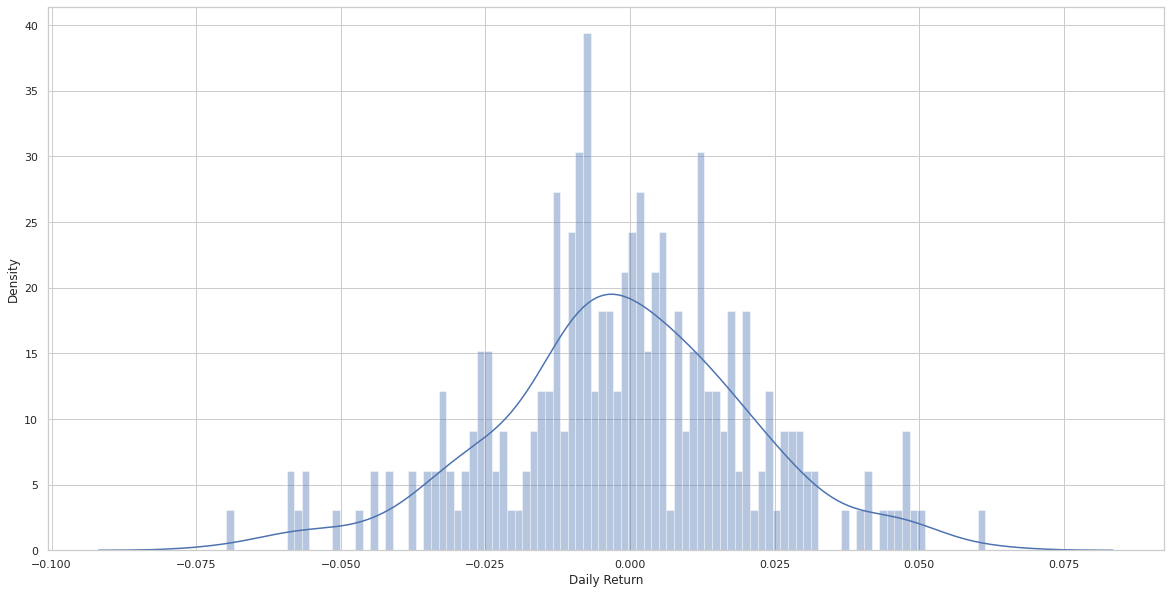

In [147]:
plt.figure(figsize=(20,10)) 
sns.distplot(NKE['Daily Return'].dropna(),bins=100,color='B')

In [148]:
(NKE['Daily Return'].dropna()).quantile(0.05)

-0.037363723813424676

The 0.05 empirical quantile of NKE stock daily returns is at -0.037. That means that with 95% confidence, our worst daily loss will not exceed 3.7%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.018 * 1,000,000 = $37,000.